# Overivew


Chrnoic Kidney Disease Prediction - Using Machine Learning

Chronic Kidney Disease (CKD) or chronic renal disease has become a major issue with a steady growth rate. A person can only survive without kidneys for an average time of 18 days, which makes a huge demand for a kidney transplant and Dialysis. It is important to have effective methods for early prediction of CKD. Machine learning methods are effective in CKD prediction. This work proposes a workflow to predict CKD status based on clinical data, incorporating data prepossessing, a missing value handling method with collaborative filtering and attributes selection.

Machine Learning Approach to Predict the Chronic Kidney Disease

It identifies the limitations in handling missing values when analysing CKD data, proposes a new method to handle missing values and presents the evaluation of different methods based on UCI dataset. Further, this work also highlights the importance of statistical analysis as well as the domain knowledge of the features when making a prediction based on clinical data related to CKD.

# Importing Libraries and Data

In [ ]:
# For Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.express as px

# Import ML Model Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import KNNImputer

# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot


# For ANN
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras as k

In [ ]:
dataframe = pd.DataFrame(pd.read_csv('/content/sample_data/kidney_disease.csv'))


# Data Exploration

In [ ]:
dataframe.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


In [ ]:
dataframe.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
dataframe.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
dataframe.describe(include='object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


In [ ]:
# dropping 'id' column
dataframe.drop('id', axis = 1, inplace = True)

In [ ]:
# setting random seeds
np.random.seed(42)

In [ ]:
# rename column names to make it more user-friendly
dataframe.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
# converting necessary columns to numerical type
dataframe['packed_cell_volume'] = pd.to_numeric(dataframe['packed_cell_volume'], errors='coerce')
dataframe['white_blood_cell_count'] = pd.to_numeric(dataframe['white_blood_cell_count'], errors='coerce')
dataframe['red_blood_cell_count'] = pd.to_numeric(dataframe['red_blood_cell_count'], errors='coerce')


<Axes: >

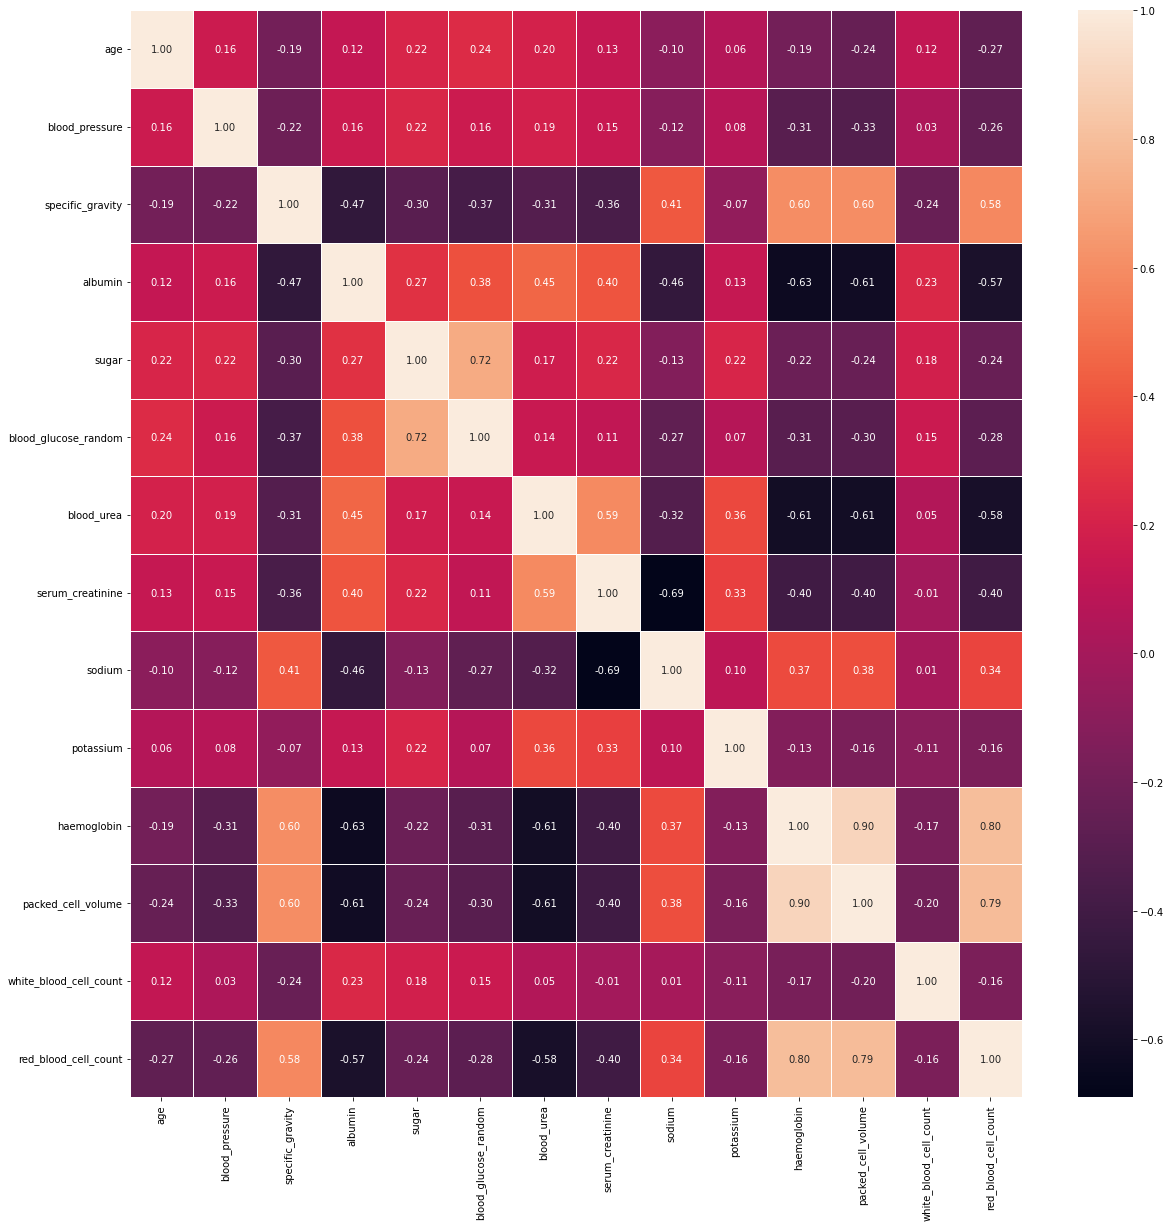

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(dataframe.corr(), annot = True, fmt=".2f",linewidths=0.5)

    Rbc count is positively correlated with specific gravity,haemoglobin,packed cell volume
    Rbc count is negatively correlated with albumin, blood urea
    Packed cell volume and haemoglobin are highly positive correlated
    Packed cell volume is negatively correlated with albumin and blood urea
    haemoglobin and albumin are negatively correlated

In [ ]:
dataframe.groupby(['red_blood_cells','class'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                ckd\t       0       NaN     NaN  NaN  NaN
                notckd    134  5.368657     5.3  4.4  6.5

We can observe that when a person is not diseased its rbc count is 134, mean is also high whereas when he is diseased count drop downs to 25-40 and mean is low.

#### Relationship between haemoglobin and packed cell volume

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

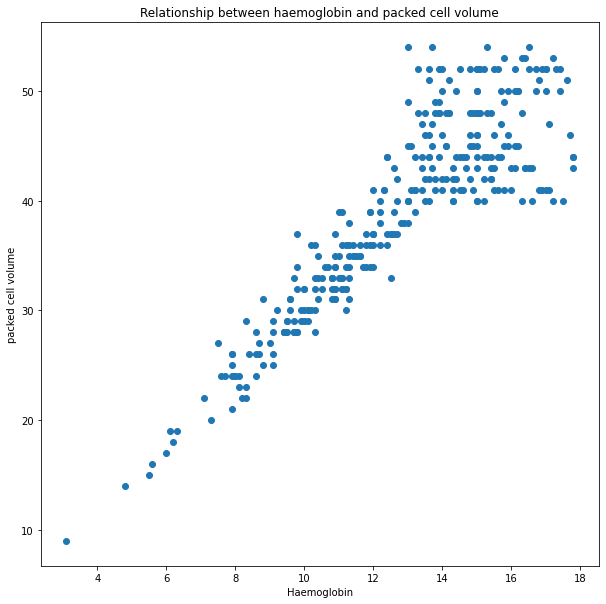

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=dataframe.haemoglobin,y=dataframe['packed_cell_volume'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')

#### Analyse distribution of red blood cell count chronic as well as non chronic

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


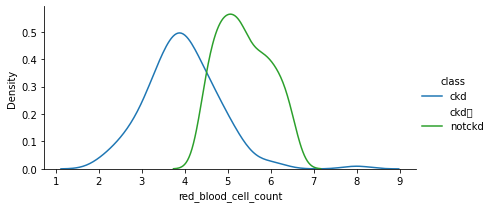

In [ ]:
grid=sns.FacetGrid(dataframe,hue='class',aspect=2)
grid.map(sns.kdeplot,'red_blood_cell_count')
grid.add_legend()

from above visuals we can say that person with lower rbc count have high chances of having chronic disease

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


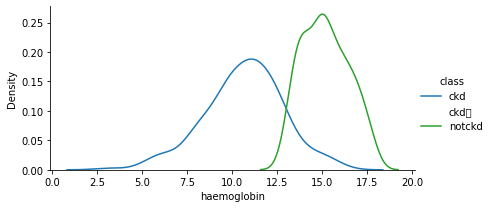

In [ ]:
grid=sns.FacetGrid(dataframe,hue='class',aspect=2)
grid.map(sns.kdeplot,'haemoglobin')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


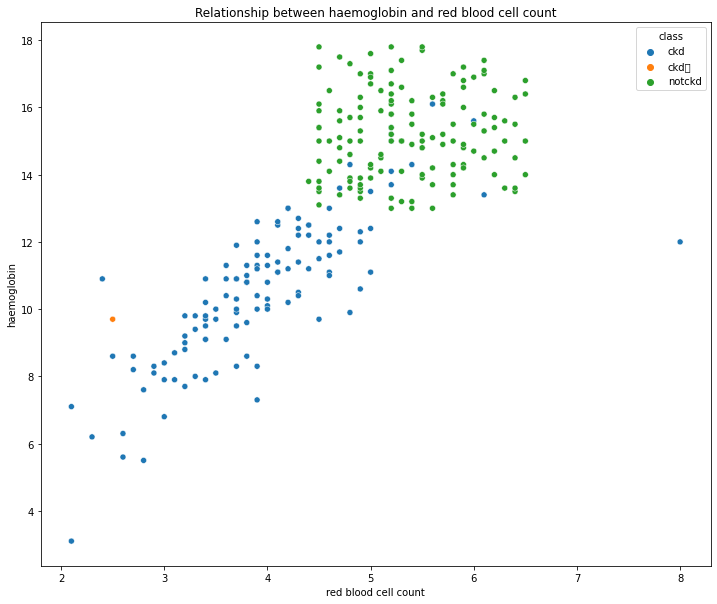

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=dataframe.red_blood_cell_count,y=dataframe['haemoglobin'],hue=dataframe['class'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

    We can see that there is some kind of linearity in all the relationships
    Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

# Data Transformation and Missing value handling

In [ ]:
# Seperating categorical and numerical data
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object']


In [ ]:
print(num_cols)

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [ ]:
print(cat_cols)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


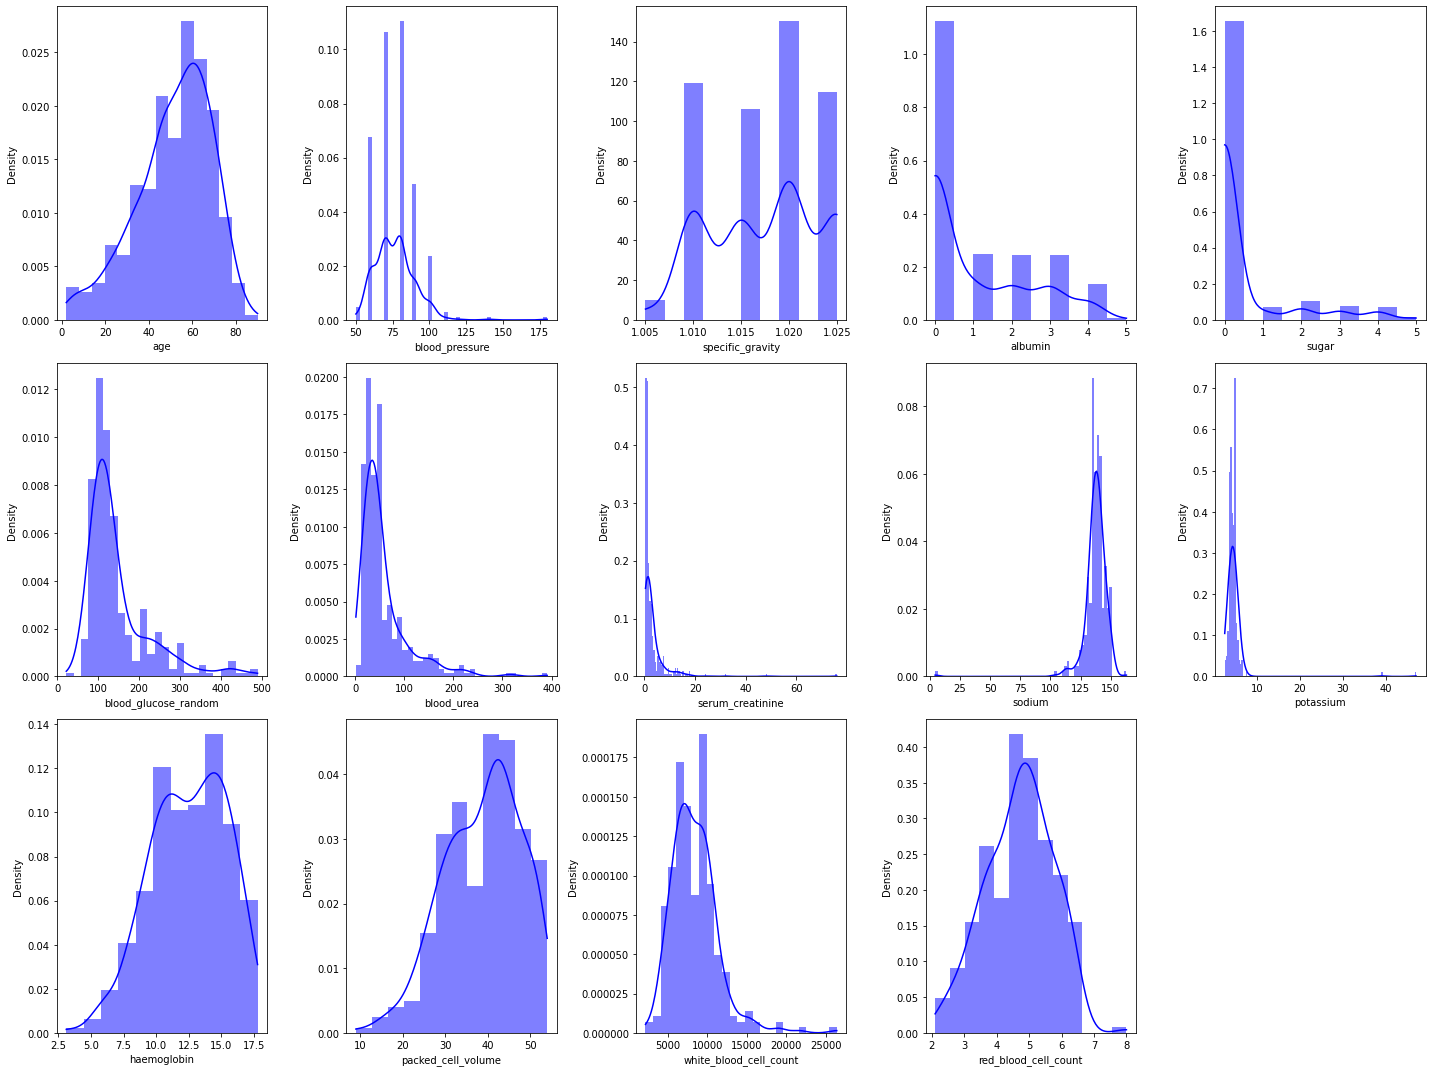

In [ ]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot (dataframe[column],color='blue',kde=True, stat="density", linewidth=0)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

<ipython-input-25-699c265d10f6>:13: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


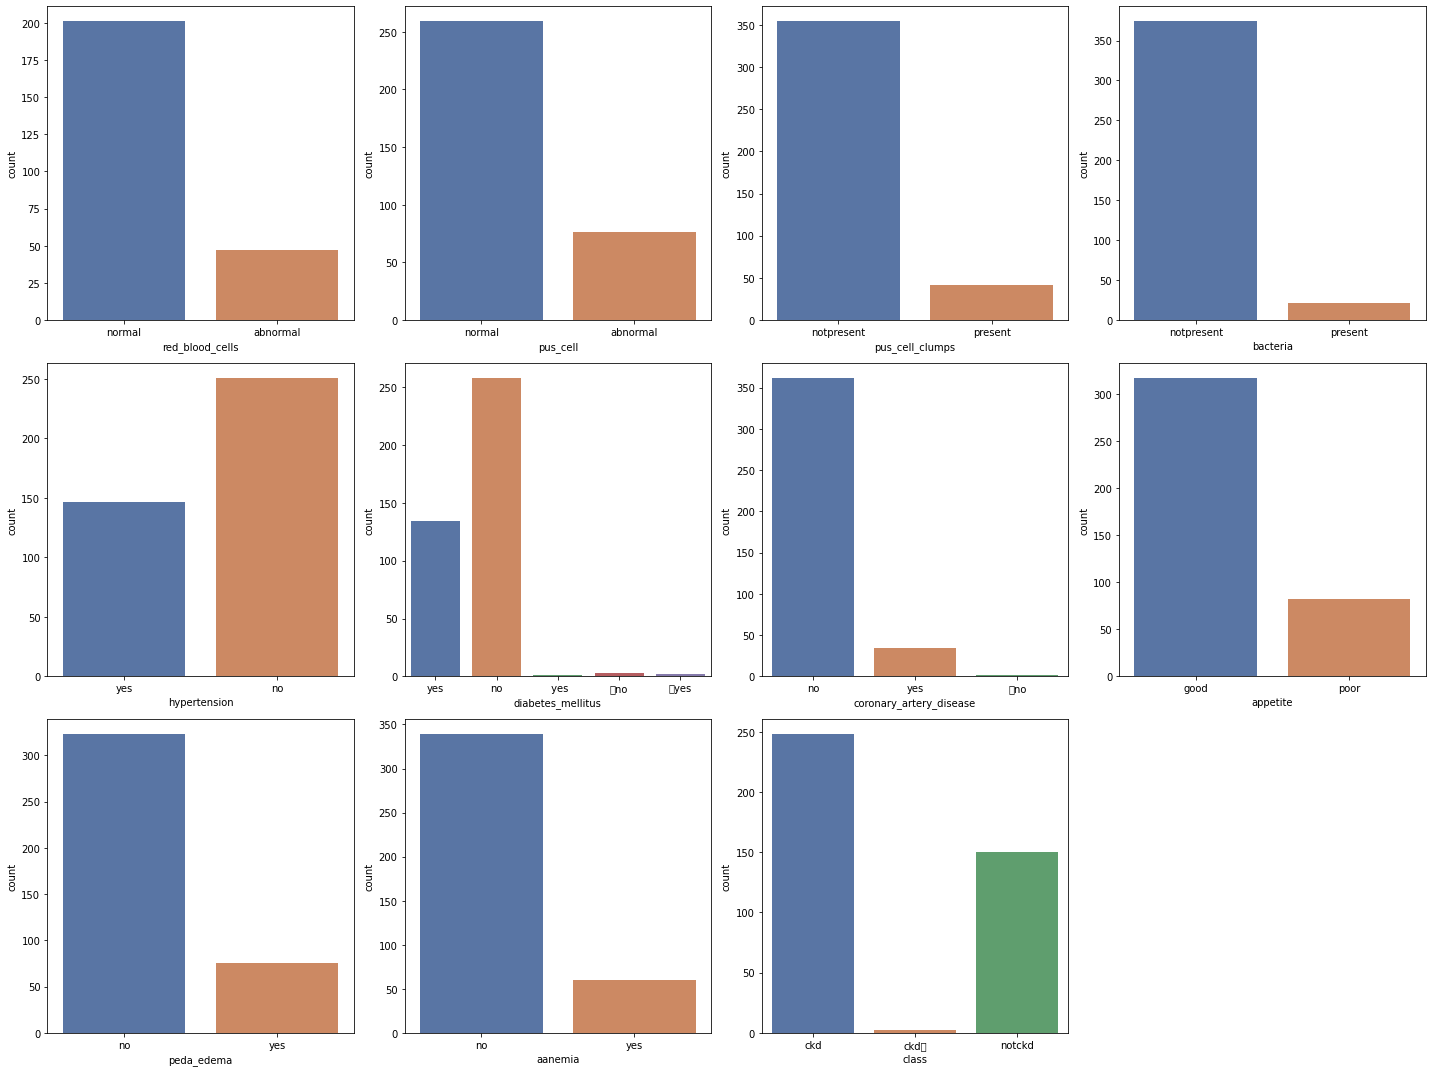

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = dataframe[column], palette = 'deep',color='black')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
# replace incorrect values
dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
dataframe['coronary_artery_disease'] = dataframe['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
dataframe['class'] = dataframe['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

# replacing 'ckd' with 0 and 'not ckd' with 1
dataframe['class'] = dataframe['class'].map({'ckd': 0, 'not ckd': 1})

# making 'class' column into a numerical column
dataframe['class'] = pd.to_numeric(dataframe['class'], errors='coerce')

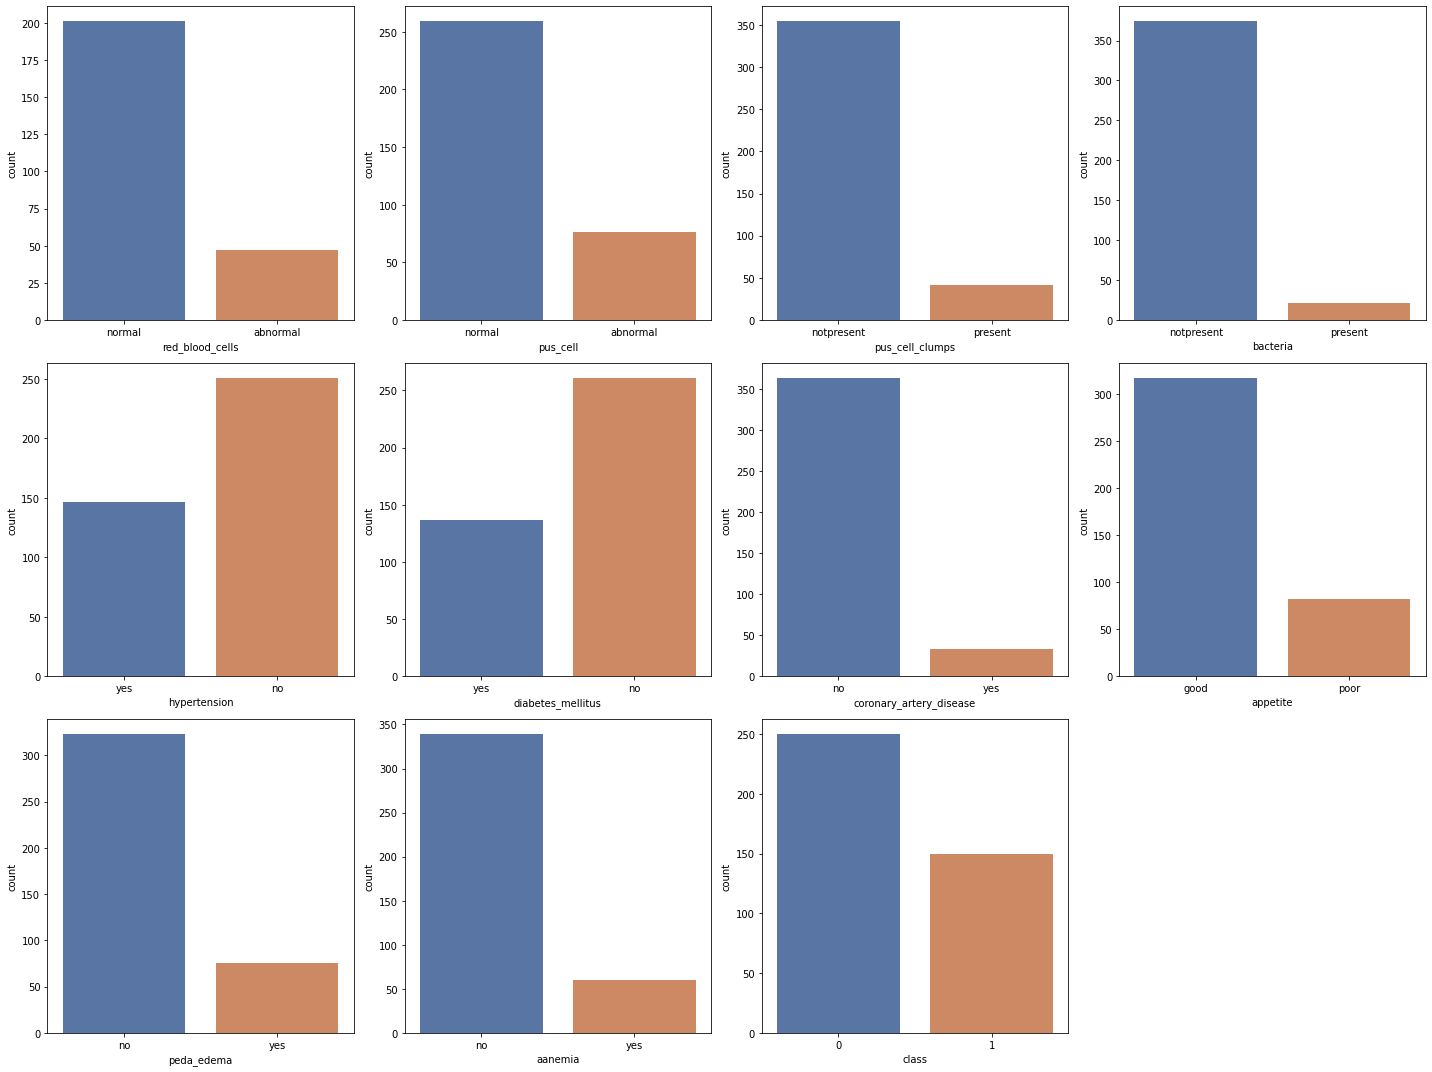

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = dataframe[column], palette = 'deep',color='black')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


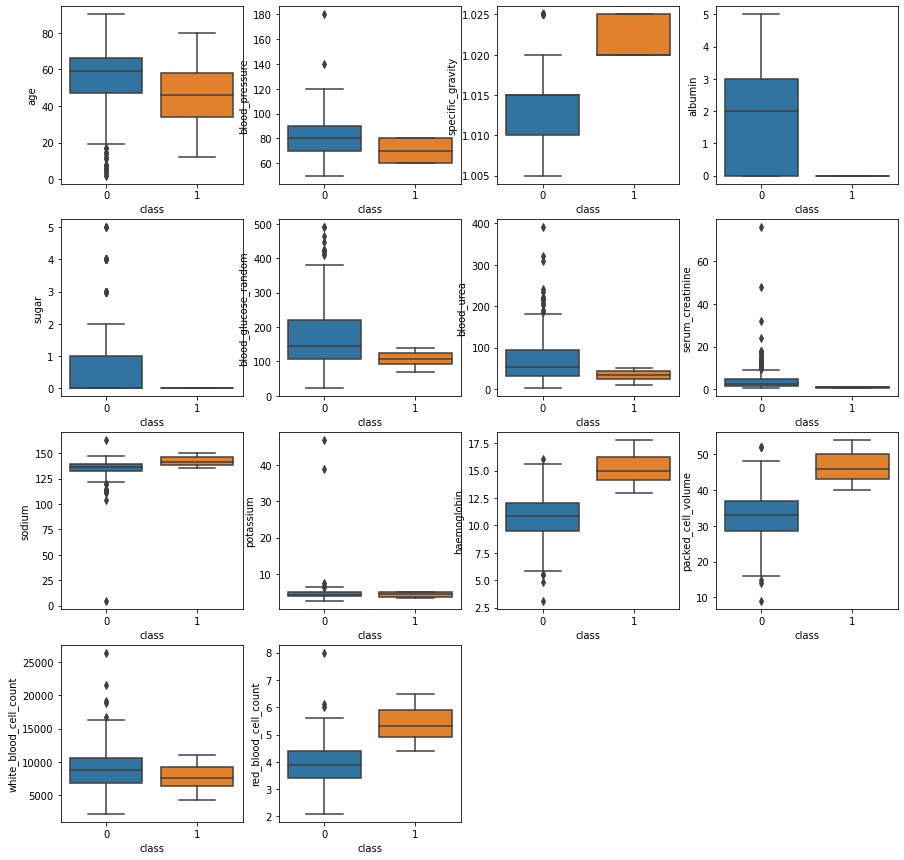

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=dataframe['class'],y=i[1],data=dataframe.reset_index())

there are outliers in dataset so filling missing values with mean is not feasible , i will use median to fill missing values

In [ ]:
# filling null values

def random_value_imputation(feature):
    random_sample = dataframe[feature].dropna().sample(dataframe[feature].isna().sum())
    random_sample.index = dataframe[dataframe[feature].isnull()].index
    dataframe.loc[dataframe[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = dataframe[feature].mode()[0]
    dataframe[feature] = dataframe[feature].fillna(mode)


# #KNN Imputer
# knn_missing_values_imputer = KNNImputer(n_neighbors=5)
# dataframe[num_cols] = pd.DataFrame(knn_missing_values_imputer.fit_transform(dataframe[num_cols]),
#                                    columns = dataframe[num_cols].columns)


# filling num_cols null values using random sampling method
for col in num_cols:
    dataframe[col].fillna(dataframe[col].dropna().median(),inplace=True)
#     random_value_imputation(col)

# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
# random_value_imputation('red_blood_cells')
# random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

## Feature Engineering and Prepearing data for madel training

In [ ]:
dictonary = {
        "red_blood_cells": {
        "abnormal":1,
        "normal": 0,
    },
        "pus_cell":{
        "abnormal":1,
        "normal": 0,
    },
        "pus_cell_clumps":{
        "present":1,
        "notpresent":0,
    },
        "bacteria":{
        "notpresent":0,
        "present": 1,
    },
        "hypertension":{
        "yes":1,
        "no": 0,
    },
        "diabetes_mellitus":{
        "yes":1,
        "no":0,
    },
        "coronary_artery_disease":{
        "yes":1,
        "no": 0,
    },
        "appetite":{
        "good":1,
        "poor": 0,
    },
        "peda_edema":{
        "yes":1,
        "no":0,
    },
        "aanemia":{
        "yes":1,
        "no":0,
    }
}

dataframe=dataframe.replace(dictonary)

In [ ]:
# le = LabelEncoder()

# for col in cat_cols:
#     dataframe[col] = le.fit_transform(dataframe[col])

# dataframe.head()


Selecting important features

    SelectKBest: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

    chi2: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ind_col=[col for col in dataframe.columns if col!='class']
dep_col='class'

In [ ]:
X=dataframe[ind_col]
Y=dataframe[dep_col]

In [ ]:
imp_features=SelectKBest(score_func=chi2,k=20)
imp_features=imp_features.fit(X,Y)

In [ ]:
features_rank=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(imp_features.scores_,columns=['Score'])],axis=1)
features_rank.columns=['features','score']
features_rank

,features,score
0,age,115.859940
1,blood_pressure,81.786701
2,specific_gravity,0.005035
3,albumin,216.000000
4,sugar,94.800000
5,red_blood_cells,28.200000
6,pus_cell,45.600000
7,pus_cell_clumps,25.200000
8,bacteria,13.200000
9,blood_glucose_random,2241.651289


In [ ]:
features_rank.nlargest(10,'score')

,features,score
16,white_blood_cell_count,9701.050391
10,blood_urea,2343.097145
9,blood_glucose_random,2241.651289
11,serum_creatinine,357.792101
15,packed_cell_volume,308.181415
3,albumin,216.000000
14,haemoglobin,123.856342
0,age,115.859940
4,sugar,94.800000
18,hypertension,88.200000


In [ ]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)


<ipython-input-38-b7bd9c339598>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_names] = x_scaler.transform(X)


In [ ]:
X.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [ ]:

# spliting data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

## Model Training and Evaluation

In [ ]:
# Random Forest
clf_rand_forest = RandomForestClassifier()
clf_rand_forest.fit(X_train, Y_train)

# SVM
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, Y_train)

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, Y_train)

# Logistic Regression
clf_log = LogisticRegression(solver='lbfgs', max_iter=2500);
clf_log.fit(X_train, Y_train);

# KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, Y_train)

# XG Boost
clf_xgb = XGBClassifier(objective = 'binary:logistic',
                        learning_rate = 0.5,
                        max_depth = 5,
                        n_estimators = 150,
                        eval_metric='mlogloss',
                        use_label_encoder=False)

clf_xgb.fit(X_train, Y_train)

# Decision Tree
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, Y_train)

# Ada Boost
clf_ada = AdaBoostClassifier(base_estimator = clf_dtc)
clf_ada.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

### Artifical Neural Network Model

In [ ]:
ann_model = Sequential()

#first layer
ann_model.add(Dense(256,input_dim= len(X.columns),kernel_initializer= k.initializers.random_normal(seed= 13),activation= 'relu'))

#second layer
ann_model.add(Dense (1, activation = 'ReLU')) #hard_sigmoid

ann_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

ANN = ann_model.fit(X_train, Y_train, epochs = 250, batch_size = X_train.shape[0])

Epoch 1/250
1/1 [==============================] - 1s 909ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 2/250
1/1 [==============================] - 0s 13ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 3/250
1/1 [==============================] - 0s 18ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 4/250
1/1 [==============================] - 0s 14ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 5/250
1/1 [==============================] - 0s 15ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 6/250
1/1 [==============================] - 0s 12ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 7/250
1/1 [==============================] - 0s 19ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 8/250
1/1 [==============================] - 0s 16ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 9/250
1/1 [==============================] - 0s 13ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 10/250
1/1 [==============================] - 0s 15ms/step - loss: 5.8808 - accuracy: 0.6187
Epoch 11/250
1/1 [

In [ ]:
model_ana ={"Random Forest":clf_rand_forest,'Support Vector Machine':clf_svm,
            'Navie Bayes':clf_gnb,"Logistic Regression":clf_log,'KNN':clf_knn,
           'XG_Boost':clf_xgb,"Decision Tree":clf_dtc,"Ada Boost":clf_ada,"ANN":ann_model}

---------------------------------------- Random Forest ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

MAPE : 0.0
RMSE : 0.0


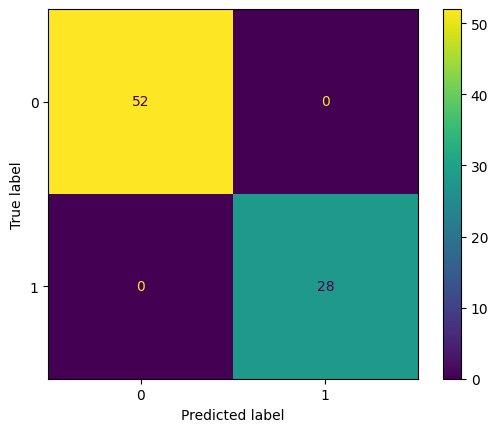

---------------------------------------- Support Vector Machine ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

MAPE : 1.25
RMSE : 0.11180339887498948


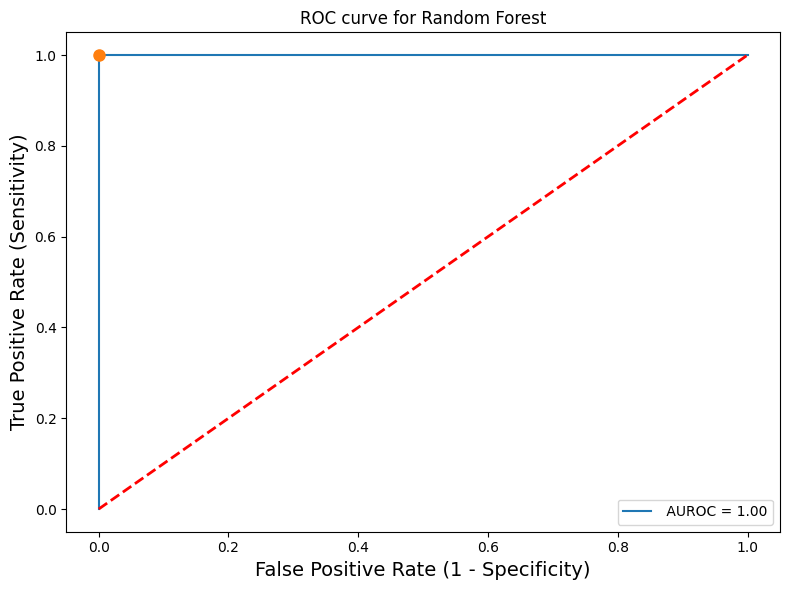

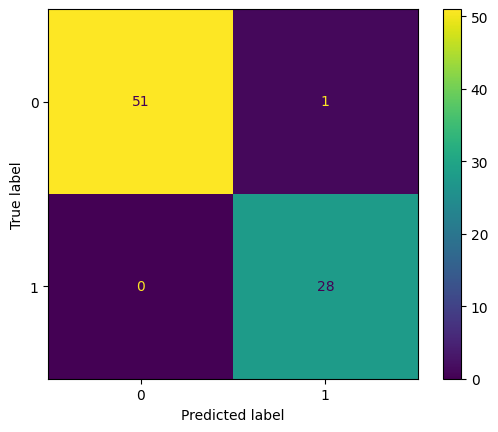

---------------------------------------- Navie Bayes ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

MAPE : 1.25
RMSE : 0.11180339887498948


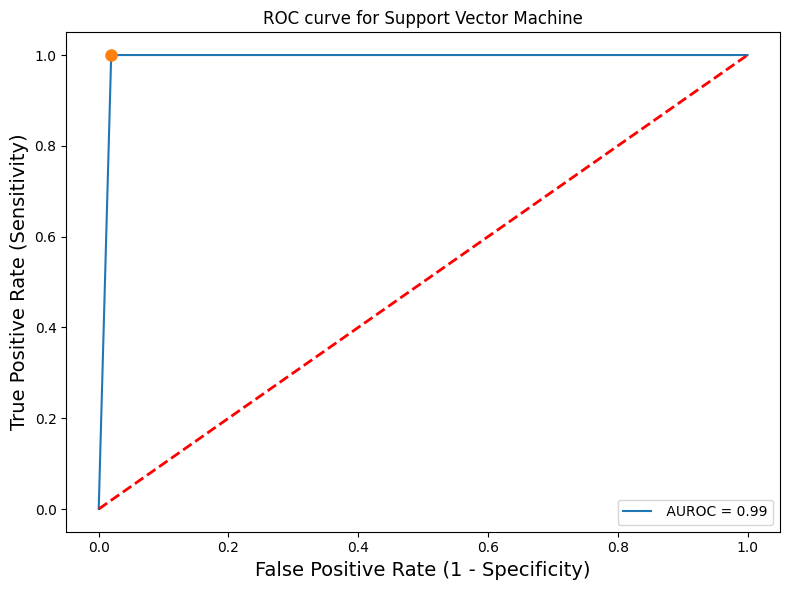

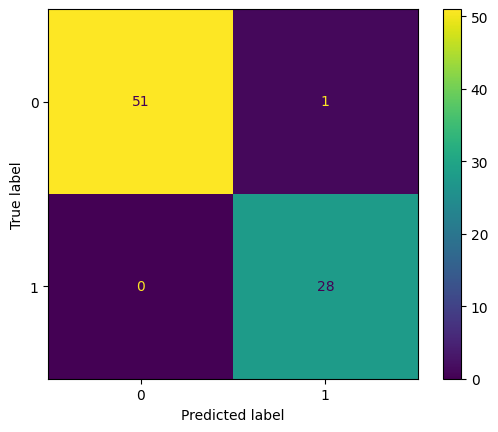

---------------------------------------- Logistic Regression ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

MAPE : 1.25
RMSE : 0.11180339887498948


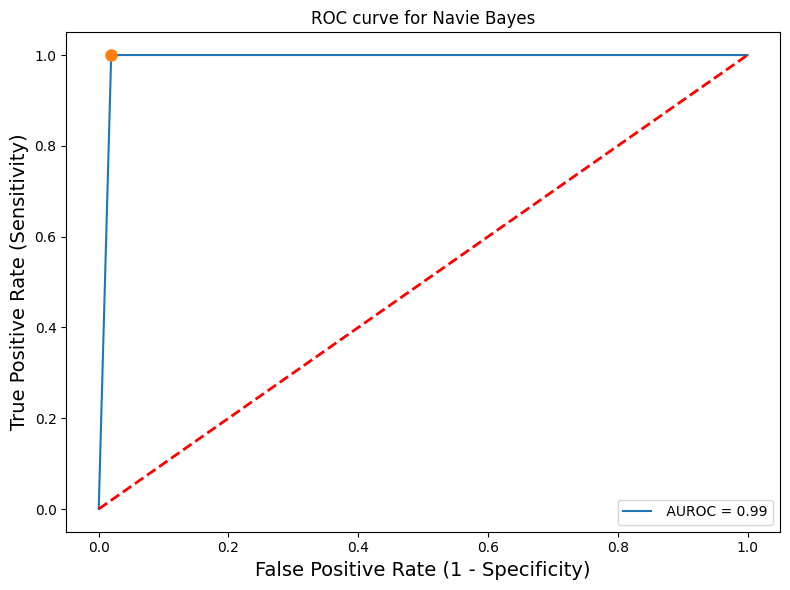

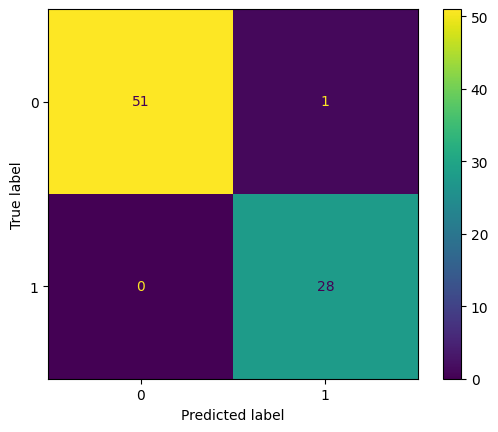

---------------------------------------- KNN ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

MAPE : 1.25
RMSE : 0.11180339887498948


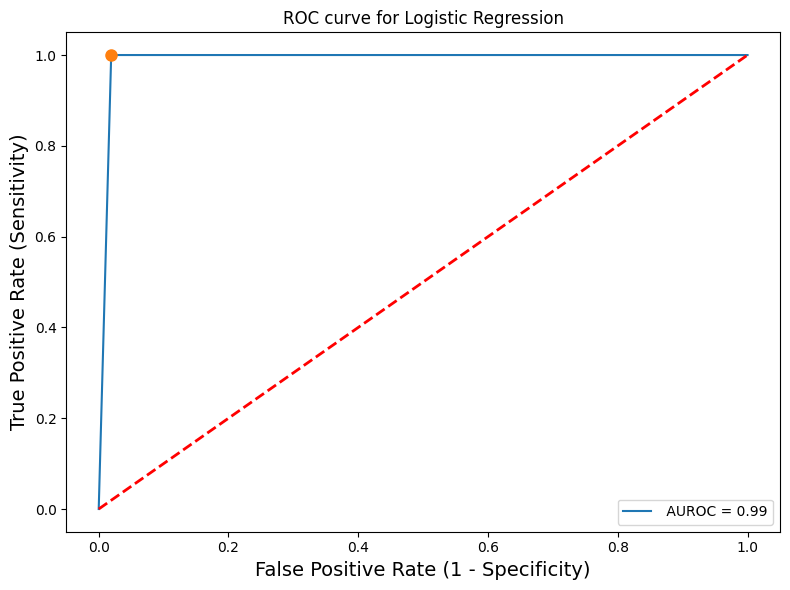

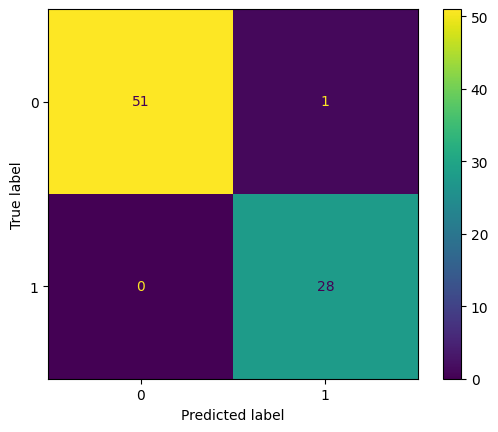

---------------------------------------- XG_Boost ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

MAPE : 1.25
RMSE : 0.11180339887498948


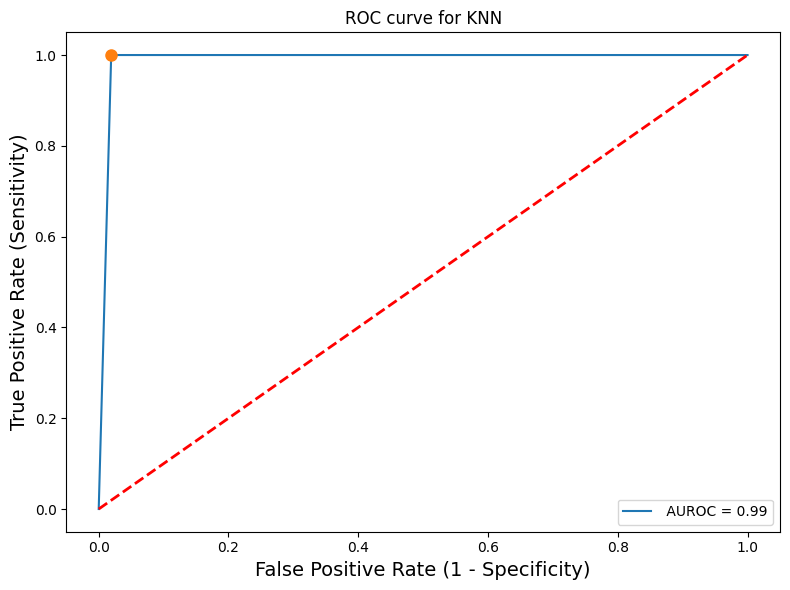

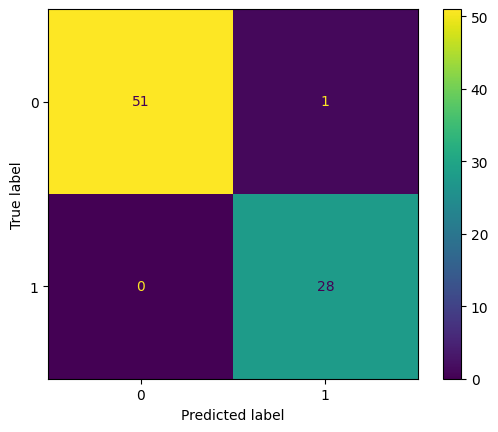

---------------------------------------- Decision Tree ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

MAPE : 1.25
RMSE : 0.11180339887498948


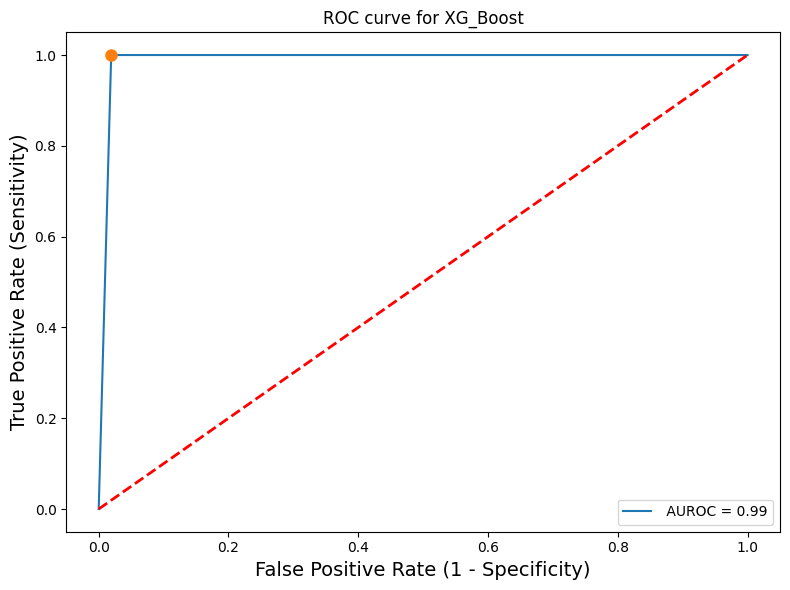

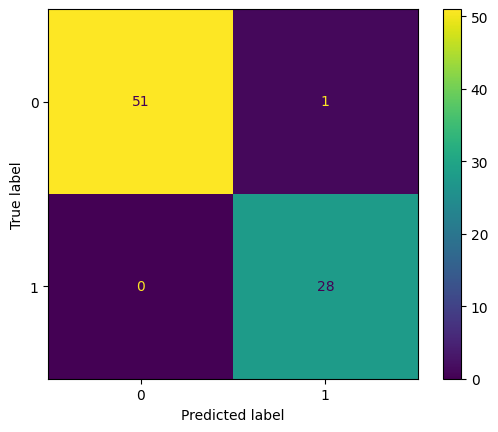

---------------------------------------- Ada Boost ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

MAPE : 1.25
RMSE : 0.11180339887498948


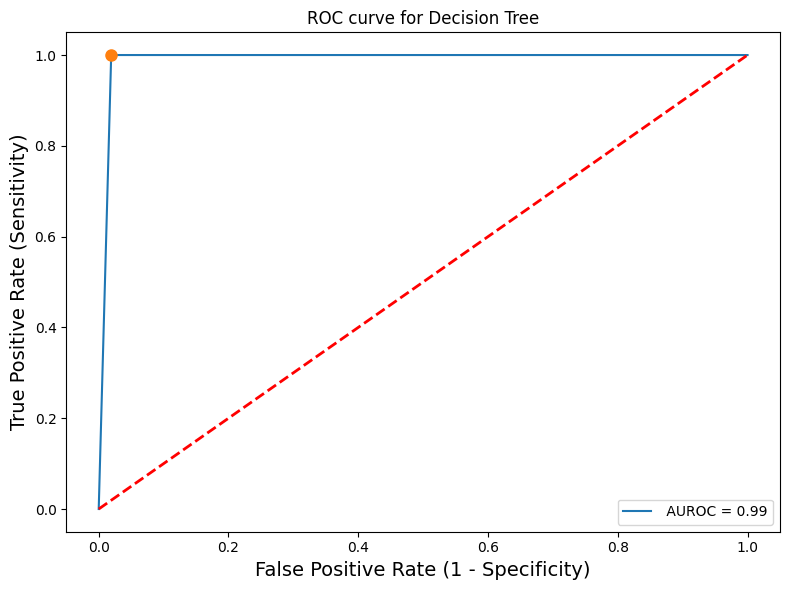

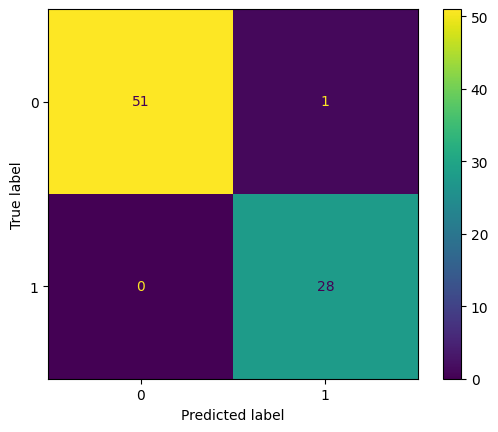

---------------------------------------- ANN ----------------------------------------
3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

MAPE : 35.0
RMSE : 0.5916079783099616


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


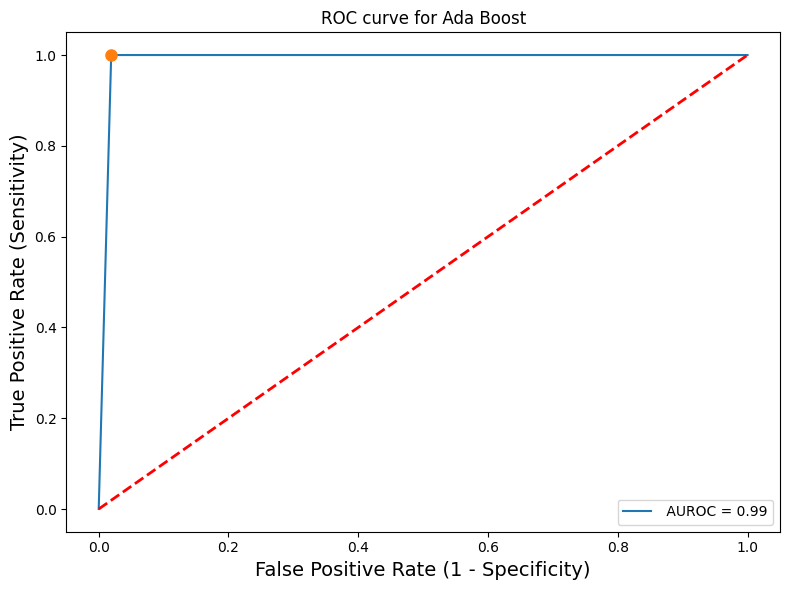

In [ ]:
model = list()
score = list()
for keys in model_ana:
    print("-"*40,keys,"-"*40)
    Y_pred = [1 if y>=0.5 else 0 for y in model_ana[keys].predict(X_test)]

    print(classification_report(Y_test, Y_pred))
    print(f"MAPE : {mean_absolute_error(Y_test,Y_pred)* 100}")
    print(f"RMSE : {mean_squared_error(Y_test,Y_pred, squared=False)}")

    if keys != "ANN":
        cm1 = confusion_matrix(Y_test, Y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model_ana[keys].classes_)
        disp.plot()
        plt.show()

        fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        plt.title(f'ROC curve for {keys}')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
                #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()
    print("="*110)
    model.append(keys)
    score.append(accuracy_score(Y_test, Y_pred))


### Comparison

In [ ]:
result_ana = pd.DataFrame({'Model' : model,'Score' : score})

sorted_models = result_ana.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()


In [ ]:
sorted_models

,Model,Score
8,ANN,0.6500
1,Support Vector Machine,0.9875
2,Navie Bayes,0.9875
3,Logistic Regression,0.9875
4,KNN,0.9875
5,XG_Boost,0.9875
6,Decision Tree,0.9875
7,Ada Boost,0.9875
0,Random Forest,1.0000


From the metrics recorded which is unrealistically very good, there are some improvements that can be done to improve the fitting performance:

1. The dataset given is very small (only 500 records). Either, a larger dataset must be used or we can also apply data augmentation (usually used for deep learning) to generate more training samples.
2. From the correlation heatmap produced above, it can be seen that there are several features with very weak correlation/no correlation. In this case, it is better perform efficient feature selection and/or feature engineering.

# Model Dumping

In [ ]:
import pickle
pickle.dump(clf_ada, open('kidney.pkl', 'wb'))

In [ ]:
pickle.dump(x_scaler, open('scaler.pkl', 'wb'))

In [ ]:
scaler = pickle.load(open('scaler.pkl', 'rb'))